In [ ]:
!pip install Pillow
!apt-get install tree

!cd ..


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (134 kB/s)
Selecting previously unselected package tree.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
#! gdown https://drive.google.com/drive/folders/1MrmwlWGtnRxWAlBx7f8F--HX921wQBMN

In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cd "/content/drive/MyDrive/DiseasePlantMini"


In [ ]:
#!unzip Prediction.zip

In [ ]:
IMAGE_SIZE = [150, 150]

# train_path = 'Prediction/train'
# valid_path = 'Prediction/test'

train_path = '/content/drive/MyDrive/DiseasePlantMini/train'
valid_path = '/content/drive/MyDrive/DiseasePlantMini/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet.layers[:-1]:  # ไม่รวมชั้นที่ไม่ต้องการลงในโมเดลใหม่
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/DiseasePlantMini/train*')

In [ ]:
import tensorflow as tf
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150, 150),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1785 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (150, 150),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 139 images belonging to 4 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=14,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/14
28/28 [==============================] - 19s 634ms/step - loss: 0.3865 - accuracy: 0.6308 - val_loss: 0.3278 - val_accuracy: 0.6691
Epoch 2/14
28/28 [==============================] - 17s 605ms/step - loss: 0.3752 - accuracy: 0.6459 - val_loss: 0.3313 - val_accuracy: 0.7338
Epoch 3/14
28/28 [==============================] - 18s 624ms/step - loss: 0.3003 - accuracy: 0.7401 - val_loss: 0.3308 - val_accuracy: 0.6475
Epoch 4/14
28/28 [==============================] - 17s 607ms/step - loss: 0.2652 - accuracy: 0.7742 - val_loss: 0.1967 - val_accuracy: 0.8777
Epoch 5/14
28/28 [==============================] - 18s 647ms/step - loss: 0.2278 - accuracy: 0.8056 - val_loss: 0.1859 - val_accuracy: 0.8489
Epoch 6/14
28/28 [==============================] - 17s 621ms/step - loss: 0.1942 - accuracy: 0.8431 - val_loss: 0.1543 - val_accuracy: 0.9137
Epoch 7/14
28/28 [==============================] - 17s 625ms/step - loss: 0.1682 - accuracy: 0.8695 - val_loss: 0.1869 - val_accuracy: 0.8129

In [ ]:
import matplotlib.pyplot as plt

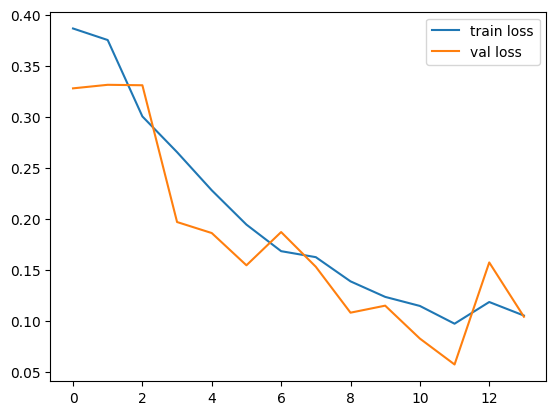

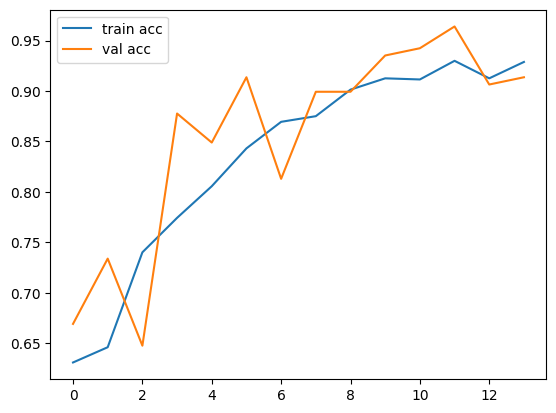

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)
y_pred

3/3 [==============================] - 1s 349ms/step


array([[1.75725687e-17, 1.00000000e+00, 4.43634492e-21, 9.67408505e-16],
       [1.28452398e-03, 4.66663449e-04, 9.97526944e-01, 7.21984368e-04],
       [9.99998093e-01, 1.43145030e-06, 1.25919883e-07, 3.19889324e-07],
       [4.64166205e-11, 9.13036397e-14, 1.00000000e+00, 1.40465653e-10],
       [8.10925267e-04, 1.01707771e-03, 9.29836242e-05, 9.98078942e-01],
       [1.00000000e+00, 3.29003029e-08, 1.24809441e-09, 1.41074752e-08],
       [4.81985398e-06, 1.86912239e-05, 8.00056682e-07, 9.99975681e-01],
       [9.99325275e-01, 6.00492058e-04, 1.34299080e-06, 7.28763334e-05],
       [7.55557930e-03, 7.63456244e-03, 1.33531960e-03, 9.83474553e-01],
       [2.28666579e-08, 2.89757573e-09, 2.95649949e-10, 1.00000000e+00],
       [1.56791601e-02, 4.12625214e-03, 9.78985906e-01, 1.20867754e-03],
       [1.52516499e-10, 1.00000000e+00, 1.59589009e-12, 1.80579631e-11],
       [1.00000000e+00, 1.34383463e-10, 5.74158915e-11, 2.45676368e-09],
       [2.89848506e-01, 2.84970010e-05, 2.54728038e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 0, 2, 3, 0, 3, 0, 3, 3, 2, 1, 0, 3, 1, 0, 2, 3, 1, 1, 1, 2,
       3, 0, 1, 0, 3, 0, 2, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 3, 3, 0, 2, 1, 3, 0, 0, 2, 2, 1, 0, 2, 1, 3, 3, 3, 0, 0, 1,
       0, 2, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 0, 3, 1, 3,
       2, 0, 3, 2, 1, 1, 2, 0, 3, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       3, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 3, 0, 3, 1, 3, 3,
       2, 3, 2, 1, 0, 2, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

NameError: ignored

In [ ]:
img=image.load_img('/content/drive/MyDrive/DiseasePlantMini/test/Brownspotdisease/Brownspotdisease (1).jpg',target_size=(150,150))

In [ ]:
x=image.img_to_array(img)
x

array([[[155., 169.,  71.],
        [193., 201., 118.],
        [134., 140.,  70.],
        ...,
        [128., 117.,  53.],
        [130., 109.,  52.],
        [ 99.,  93.,  35.]],

       [[141., 155.,  57.],
        [158., 162.,  85.],
        [177., 183., 111.],
        ...,
        [131., 120.,  58.],
        [106.,  90.,  39.],
        [ 81.,  78.,  23.]],

       [[152., 162.,  66.],
        [149., 152.,  75.],
        [192., 196., 122.],
        ...,
        [135., 119.,  57.],
        [ 81.,  69.,  21.],
        [ 84.,  83.,  29.]],

       ...,

       [[ 66.,  98.,  22.],
        [ 76., 100.,  24.],
        [ 73.,  93.,  21.],
        ...,
        [ 55.,  47.,  24.],
        [ 54.,  48.,  22.],
        [ 50.,  42.,  19.]],

       [[ 66., 100.,  23.],
        [ 68.,  94.,  20.],
        [ 81., 108.,  27.],
        ...,
        [ 56.,  51.,  22.],
        [ 54.,  50.,  23.],
        [ 43.,  39.,  14.]],

       [[ 65., 100.,  20.],
        [ 70.,  98.,  23.],
        [ 74., 1

In [ ]:
x.shape

(150, 150, 3)

In [ ]:
x=x/255.0

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 150, 150, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 258ms/step


array([[1., 0., 0., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
prediction = model.predict(img_data)
max_prob = np.max(prediction)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 19ms/step


In [ ]:
a = (predicted_class == 1)

In [ ]:
a = (predicted_class == 1)
if a:
    print("a is equal to 1")
else:
    print("a is not equal to 1")


a is not equal to 1


In [ ]:
a = (predicted_class == 1)
if a:
    a = 1
else:
    a = 0

In [ ]:
a==1

False

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'